In [85]:
from sympy import *
import inspect
import numpy as np
from fractions import Fraction
init_printing()
%run -i symbol_func_spaces.py


In [86]:
s=Symbol("s")
p=Symbol("p")
n=Symbol("n")
q=Symbol("q")
f=Symbol("f")
g=Symbol("g")
alpha=Symbol("alpha")
r=Symbol("r")
k=Symbol("k")
l=Symbol("l")
j=Symbol("j")

In [87]:
nabla=Symbol(r'\nabla')
lap=Symbol(r'\triangle')

In [88]:
nabla

In [89]:
class Freq_proj_base(Function):
    @classmethod
    def eval(cls, k, f):
       pass

    def _latex(self, printer):
        k, f = self.args
        _k, _f = printer._print(k), printer._print(f)    
        return r'P_{%s}%s' % (_k, _f)

In [90]:
class Freq_proj(Function):
    @classmethod
    def eval(cls, k, f):
        if f.has(nabla):
            return 2**k *Freq_proj_base(k,f.args[1])
        if f.has(lap):
            return 2**(2*k) *Freq_proj_base(k,f.args[1])
        else:
             return Freq_proj_base(k,f)

In [91]:
Freq_proj(2,nabla*f)

In [92]:
Freq_proj(k,nabla*f) 

In [93]:
Freq_proj(k,nabla*f)  * Freq_proj(k,lap*g)

In [94]:
Freq_proj(k,f)

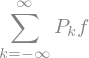

In [95]:
summation(Freq_proj(k,f), (k, -oo, oo))

In [96]:
Freq_proj(k,nabla*g) 

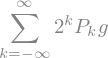

In [97]:
summation(Freq_proj(k,nabla*g), (k, -oo, oo))

In [98]:
class Paraproduct(Function):
    @classmethod
    def eval(cls,f,g):
       return Para_hh(f,g) + Para_hl(f,g) + Para_lh(f,g)

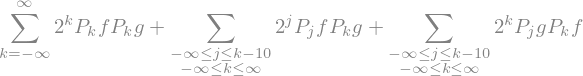

In [99]:
Paraproduct(nabla*f,g)

In [106]:
latex(Paraproduct(nabla*f,lap*g))

'\\sum_{k=-\\infty}^{\\infty} 2^{3 k} P_{k}f P_{k}g + \\sum_{\\substack{-\\infty \\leq j \\leq k - 10\\\\-\\infty \\leq k \\leq \\infty}} 2^{j} 2^{2 k} P_{j}f P_{k}g + \\sum_{\\substack{-\\infty \\leq j \\leq k - 10\\\\-\\infty \\leq k \\leq \\infty}} 2^{2 j} 2^{k} P_{j}g P_{k}f'

In [101]:
class Para_hh(Function):
    @classmethod
    def eval(cls,f,g):
       return summation(Freq_proj(k,f)*Freq_proj(k,g), (k, -oo, oo))

In [102]:
class Para_hl(Function):
    @classmethod
    def eval(cls,f,g):
       return summation(summation(Freq_proj(k,f)*Freq_proj(j,g), (j, -oo,k-10)),(k, -oo, oo))

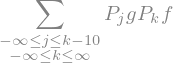

In [103]:
Para_hl(f,g)

In [104]:
class Para_lh(Function):
    @classmethod
    def eval(cls,f,g):
       return summation(summation(Freq_proj(j,f)*Freq_proj(k,g), (j, -oo,k-10)),(k, -oo, oo))

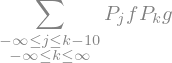

In [105]:
Para_lh(f,g)